In [17]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from copy import deepcopy

#after Importing the important libraries I've set up the ploting layout

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

#for the sake of this demo assignment I've used an old 2d float value dataset

df = pd.read_csv('xclara.csv')

In [18]:
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


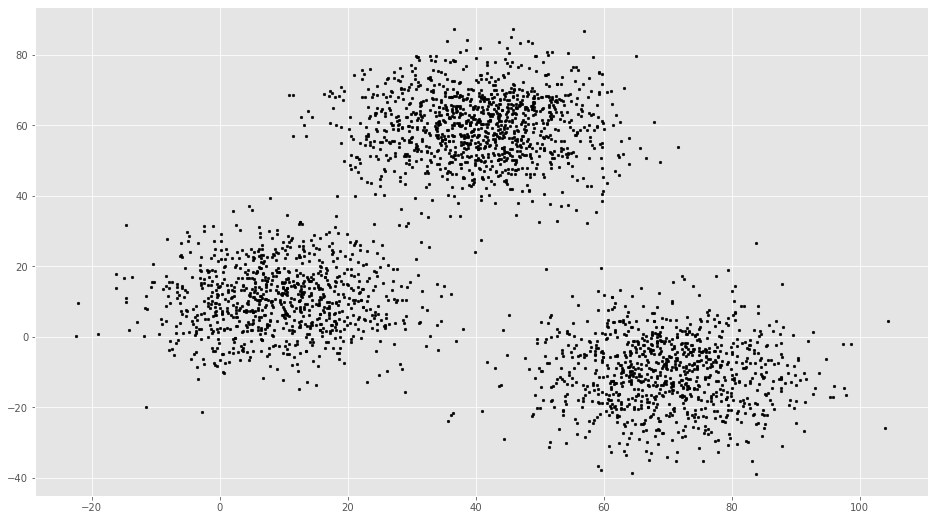

In [19]:
#i've split features into 2 sections and then combined it into an array names X

f1 = df['V1'].values
f2 = df['V2'].values
X = np.array(list(zip(f1, f2)))

#Plotting the scattered values on the chart bellow

plt.scatter(f1, f2, color="black", s=7)

[[72. 20.]
 [19. 27.]
 [68. 57.]]


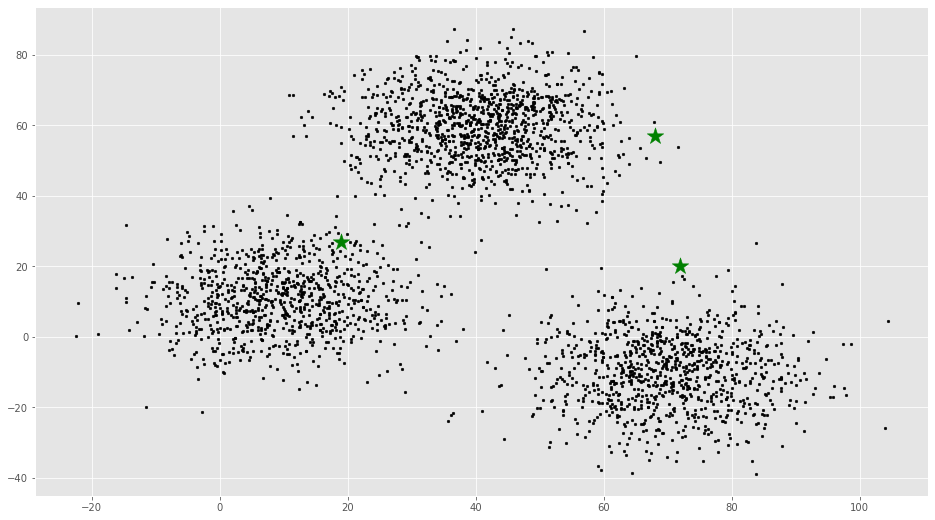

In [20]:
#I will be using Euclidean calculator 
def dist(a, b, ax =1):
    return np.linalg.norm(a - b, axis = ax)

k=3 # This will be the number of clusters we will be needing if we look at the graph

#(low, high, size, dtype) the size is the number of random values we want
#this process will help use plot the centroids
C_x = np.random.randint(0, np.max(X), size = k)
C_y = np.random.randint(0, np.max(X), size = k)

#now combining the x and y values into an array of lists
C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)
#Ploting the points in X and centroids in C

plt.scatter(f1, f2, color = 'Black', s= 7)
plt.scatter(C_x, C_y, marker= "*", color = 'green', s = 300)

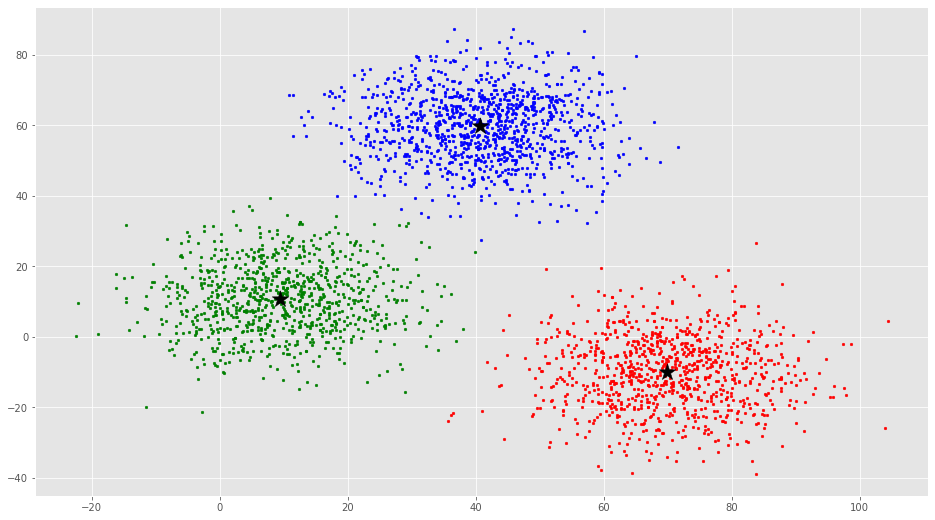

In [26]:
#we'll used C_old to calculate the error between the new and old centroid
C_old = np.zeros(C.shape)

clusters = np.zeros(len(X)) #I created new array filled with zeros

#Error function - distance between the new centroids
error = dist(C, C_old, None)

#Loop is used to run till the error becomes zero
while error !=0: 
    #assigning each value to its closest cluster
    for i in range(len(X)):
        distance = dist(C, X[i])
        min_distance = np.argmin(distance)
        clusters[i] = min_distance
    
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if(clusters[j] ==i)]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

color = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if(clusters[j]==i)])
    ax.scatter(points[:,0], points[:,1], c=color[i], s=7)
ax.scatter(C[:,0], C[:,1], marker = '*', c= 'black', s = 300)